# GeoDF merge demo

In [35]:
import geopandas as gpd
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


a shapefile of NYC zipcodes

In [36]:
zips = gpd.GeoDataFrame.from_file("ZIP_CODE_040114.shp")

In [5]:
zips.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


a shape file of 311 service requests, juts a small subset of the whole data

In [38]:
too = pd.read_csv("https://serv.cusp.nyu.edu/~fbianco/PUIdata/311_Service_Requests_from_2010_to_Present_short.csv")

In [40]:
too.shape

(99, 7)

In [39]:
too.head()

,Unique Key,Created Date,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
0,34212771,09/01/2016 12:00:06 AM,11413.0,1052223.0,185368.0,40.675208,-73.754949
1,34212392,09/01/2016 12:00:35 AM,10469.0,1023875.0,259913.0,40.879986,-73.856707
2,34214520,09/01/2016 12:00:37 AM,11369.0,1019812.0,217879.0,40.764632,-73.871623
3,34212483,09/01/2016 12:00:54 AM,10466.0,1025510.0,261946.0,40.885559,-73.850782
4,34214231,09/01/2016 12:01:15 AM,10040.0,1003750.0,254115.0,40.864140,-73.929501


the geodataframe can be plotted

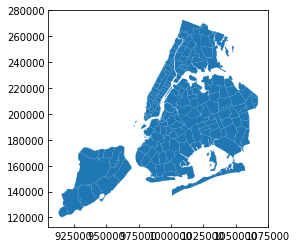

In [7]:
zips.plot()

prettifying the plot a bit

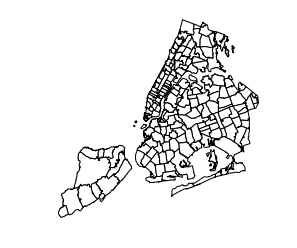

In [46]:
ax = zips.plot(color='w', edgecolor="black")
ax.axis('off');

what coordinates is the file in?

In [47]:
zips.crs

{'datum': 'NAD83',
 'lat_0': 40.16666666666666,
 'lat_1': 40.66666666666666,
 'lat_2': 41.03333333333333,
 'lon_0': -74,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'us-ft',
 'x_0': 300000,
 'y_0': 0}

In [9]:
too = from_geom(4326)

AttributeError: 'DataFrame' object has no attribute 'crs'

this cannot work with the 311 file, cause it is not a geo dataframe. I want to inherit the geometru from the gdf by merging the files on zipcode. To obtain a geodataframe from the merge I have to initiate the merge from the geodataframe as zips.merge() as opposed to too.merge() or pd.merge()

In [48]:
merged_data = zips.merge(too, left_on = 'ZIPCODE', right_on = 'Incident Zip')

In [49]:
merged_data.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,Unique Key,Created Date,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude


the merge failed cause the zipcodes are recorded as different objects in the dataframe and in the geodataframe

In [50]:
too['Incident Zip']

0     11413.0
1     10469.0
2     11369.0
3     10466.0
4     10040.0
5     10031.0
6     11365.0
7     11103.0
8     10468.0
9     11222.0
10    11249.0
11    10003.0
12    10031.0
13    11367.0
14    10003.0
15    11421.0
16    10453.0
17    11221.0
18    10023.0
19    11204.0
20    11367.0
21    11416.0
22        NaN
23    11225.0
24    11372.0
25    11367.0
26    11355.0
27        NaN
28    11106.0
29    11377.0
       ...   
69    11238.0
70    11225.0
71    10040.0
72    10454.0
73    11212.0
74    10457.0
75    10040.0
76        NaN
77    11229.0
78        NaN
79    11229.0
80    11207.0
81    11238.0
82        NaN
83    10001.0
84    11421.0
85    11225.0
86    11207.0
87    11106.0
88    11372.0
89    10027.0
90    11238.0
91    10011.0
92    11434.0
93    10027.0
94    11370.0
95    10021.0
96    10471.0
97    11428.0
98    11222.0
Name: Incident Zip, Length: 99, dtype: float64

in the dataframe too the zipcode is a floating point number

In [13]:
zips['ZIPCODE']

0      11436
1      11213
2      11212
3      11225
4      11218
5      11226
6      11219
7      11210
8      11230
9      11204
10     10471
11     10470
12     10466
13     10467
14     10463
15     10475
16     10464
17     10469
18     10468
19     10463
20     10458
21     10034
22     10033
23     10462
24     10040
25     10453
26     10465
27     10464
28     10464
29     10461
       ...  
233    10120
234    10278
235    10155
236    10043
237    10081
238    10096
239    10097
240    10196
241    10196
242    10275
243    10265
244    10045
245    10047
246    10047
247    10080
248    10203
249    10259
250    10260
251    10285
252    10286
253    10035
254    11371
255    11361
256    10036
257    11414
258    10310
259    11693
260    11249
261    10162
262    10119
Name: ZIPCODE, Length: 263, dtype: object

in the zipcodes gdf the zipcode is an object, not an integer as it looked! Let's convert both to integers

In [51]:
zips['ZIPCODE_join'] = zips['ZIPCODE'].astype(int)

In [52]:
too['ZIPCODE_join'] = too['Incident Zip'].astype(int) 

ValueError: Cannot convert non-finite values (NA or inf) to integer

failed because of NaN's in the column. Remove the NaN first

In [53]:
too = too.dropna(subset = ['Incident Zip'])

In [54]:
too['ZIPCODE_join'] = too['Incident Zip'].astype(int) 

now we should be able to merge. Let's count the number of 311 requests for each zipcode.

In [56]:
zips.merge(too)

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,...,SHAPE_LEN,geometry,ZIPCODE_join,Unique Key,Created Date,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
0,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,...,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1...",11212,34218182,09/01/2016 12:26:27 AM,11212.0,1010154.0,178838.0,40.657508,-73.906638
1,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,...,0.0,"POLYGON ((995908.3654508889 183617.6128015518,...",11225,34217959,09/01/2016 12:08:39 AM,11225.0,995025.0,182824.0,40.668480,-73.961159
2,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,...,0.0,"POLYGON ((995908.3654508889 183617.6128015518,...",11225,34211967,09/01/2016 12:19:49 AM,11225.0,994885.0,183552.0,40.670478,-73.961662
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,...,0.0,"POLYGON ((995908.3654508889 183617.6128015518,...",11225,34211701,09/01/2016 12:25:34 AM,11225.0,994793.0,182891.0,40.668664,-73.961995
4,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,...,0.0,"POLYGON ((995908.3654508889 183617.6128015518,...",11225,34218919,09/01/2016 12:33:49 AM,11225.0,995203.0,183465.0,40.670239,-73.960516
5,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,...,0.0,"POLYGON ((991997.1134308875 176307.4958601296,...",11218,34217179,09/01/2016 12:18:13 AM,11218.0,987044.0,173146.0,40.641922,-73.989932
6,11204,0,Brooklyn,77354.0,4.355518e+07,NY,Kings,36,047,http://www.usps.com/,...,0.0,"POLYGON ((989500.1699339747 170730.1687602103,...",11204,34217113,09/01/2016 12:07:09 AM,11204.0,990555.0,165641.0,40.621321,-73.977288
7,11204,0,Brooklyn,77354.0,4.355518e+07,NY,Kings,36,047,http://www.usps.com/,...,0.0,"POLYGON ((989500.1699339747 170730.1687602103,...",11204,34211957,09/01/2016 12:19:32 AM,11204.0,988033.0,161993.0,40.611309,-73.986375
8,10471,0,Bronx,23477.0,8.965141e+07,NY,Bronx,36,005,http://www.usps.com/,...,0.0,"POLYGON ((1016890.088579223 269622.9437433034,...",10471,34213103,09/01/2016 12:39:27 AM,10471.0,1012781.0,265876.0,40.896396,-73.896800
9,10466,0,Bronx,68942.0,5.526249e+07,NY,Bronx,36,005,http://www.usps.com/,...,0.0,"POLYGON ((1027197.215602726 268941.3607888818,...",10466,34212483,09/01/2016 12:00:54 AM,10466.0,1025510.0,261946.0,40.885559,-73.850782


In [57]:
too.groupby('ZIPCODE_join').count()

,Unique Key,Created Date,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
ZIPCODE_join,,,,,,,
10001,4,4,4,4,4,4,4
10003,3,3,3,3,3,3,3
10009,1,1,1,1,1,1,1
10011,1,1,1,1,1,1,1
10012,1,1,1,1,1,1,1
10021,1,1,1,1,1,1,1
10023,2,2,2,2,2,2,2
10027,3,3,3,3,3,3,3
10031,3,3,3,3,3,3,3


this above is the dataset I want to merge with the zipcode gdf to plot the zipcodes by number of 311 requests

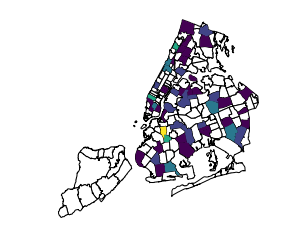

In [61]:
ax = zips.plot(color='w', edgecolor="black")
zips.merge(too.groupby('ZIPCODE_join').count().reset_index(), on='ZIPCODE_join').plot(column="Unique Key", ax=ax)
ax.axis('off');